# SVM Use Case : Prediction of SUV buying behaviour

We have been given a problem on Support Vector Machines and the objective of the case study is to predict if the user is going to buy an SUV. We first load the dataset and then carry out data exploration. We take a peek at the data, study descriptive 
statistics, class distribution and corrlation between attributes. We further explore the data and then carry out data visualization using univariate (histogram, density and box and whisker) plots and multivariate (scatter plot matrix and correlation matrix) plots. We then split the data into train and test data and then instantiate an SVM model and fit the data. We predict the values and plot the confusion matrix.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from patsy import dmatrices
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset

In [14]:
df = pd.read_excel('/home/an09893140/Social_Network_Ads.xlsx')

In [15]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
# Data Exploration

In [17]:
# Peek at data

In [18]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [19]:
# Dimensions 

In [20]:
df.shape

(400, 5)

In [21]:
# Descriptive statistics

In [22]:
df.describe().drop(["User ID","Purchased"],axis = 1)

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [23]:
# Class distribution

In [24]:
df.groupby("Purchased").size()

Purchased
0    257
1    143
dtype: int64

In [25]:
df.groupby("Gender").size()

Gender
Female    204
Male      196
dtype: int64

In [26]:
# Correlation between attributes

In [27]:
df1 = df.corr(method = "pearson").drop(["User ID","Purchased"],axis = 1)

In [28]:
df1

,Age,EstimatedSalary
User ID,-0.000721,0.071097
Age,1.000000,0.155238
EstimatedSalary,0.155238,1.000000
Purchased,0.622454,0.362083


In [29]:
# Further exploration

In [30]:
df.groupby("Purchased").mean().drop("User ID",axis = 1)

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [31]:
df.groupby("Gender").mean().drop("User ID",axis = 1)

,Age,EstimatedSalary,Purchased
Gender,,,
Female,38.411765,71759.803922,0.377451
Male,36.867347,67642.857143,0.336735


In [32]:
# Data Visualization

In [33]:
# histograms

In [34]:
df2 = df.drop("User ID",axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46ac1a48d0>,
      dtype=object)

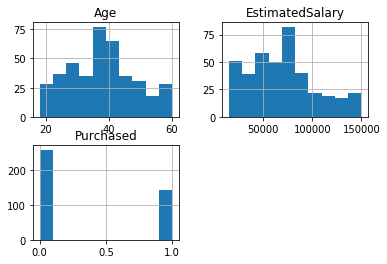

In [35]:
df2.hist()

In [36]:
# density plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46a4ee44a8>,
      dtype=object)

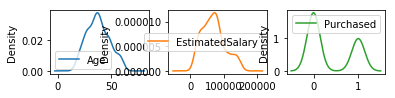

In [37]:
df2.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

In [38]:
# Box and Whisker Plots

Age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
EstimatedSalary    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Purchased          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

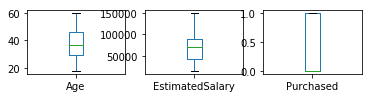

In [39]:
df2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

In [40]:
# Multivariate Plots

In [41]:
# Correlation matrix

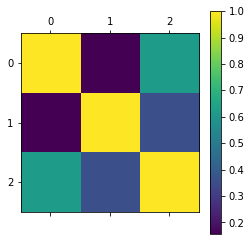

In [43]:
correlations = df2.corr()
plt.matshow(correlations)
plt.colorbar()


In [44]:
# Scatter Plot Matrix

In [45]:
from pandas.tools.plotting import scatter_matrix

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46a48d3908>,
      dtype=object)

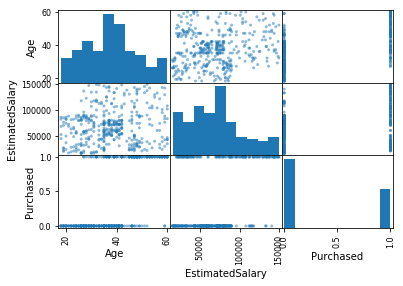

In [46]:
scatter_matrix(df2)

In [77]:
# Stacked Bar plot

In [78]:
ct1 = pd.crosstab(df['Gender'],df['Purchased'])

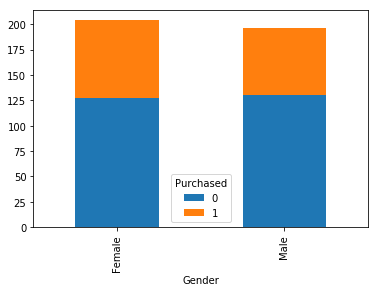

In [79]:
ct1.plot.bar(stacked=True)

In [74]:
ct = pd.crosstab(df['Age'],df['Purchased'])

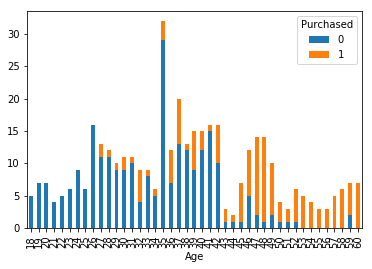

In [75]:
ct.plot.bar(stacked=True)

In [47]:
df2

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [48]:
# form feature matrix and target vector

In [49]:
Y,X = dmatrices('Purchased ~ Gender + Age + EstimatedSalary',df2,return_type = 'dataframe')

In [50]:
# Train test split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [52]:
# instantiate a model

In [53]:
model = SVC(class_weight = 'balanced')

In [54]:
# fit the model

In [55]:
model.fit(X_train,Y_train)

/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
# predict 

In [57]:
predicted = model.predict(X_test)

In [58]:
# accuracy score

In [59]:
model.score(X_test,Y_test)

0.8

In [60]:
# metrics of the confusion matrix

In [61]:
print(metrics.confusion_matrix(Y_test, predicted))
print (metrics.classification_report(Y_test, predicted))

[[57  1]
 [15  7]]
             precision    recall  f1-score   support

        0.0       0.79      0.98      0.88        58
        1.0       0.88      0.32      0.47        22

avg / total       0.81      0.80      0.76        80



In [62]:
# confusion matrix plot

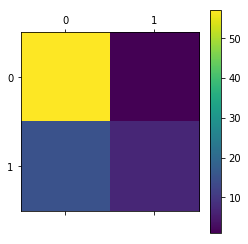

In [63]:
cm = confusion_matrix(Y_test, predicted)
plt.matshow(cm)
plt.colorbar()
